Setting up Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re  # Import re for regex-based tokenization

plt.style.use('ggplot')

# # Define the custom tokenization function
# def simple_tokenize(text):
#     tokens = text.split()  # Basic tokenization by splitting on whitespace
#     return tokens

# Reading data 
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")

# Show the specified index on the 'Reviews' row
print(df['Reviews'].values[0])  

# Print the shape of the dataset.
print(df.shape)

# Display the first few rows of the DataFrame
df = df.head(500)


I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!
(413840, 6)


QUICK EDA

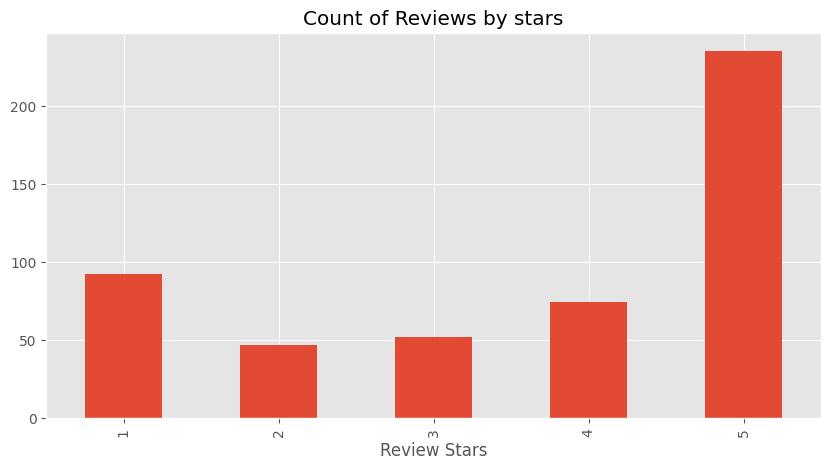

In [3]:
# Quick EDA: Plot the count of reviews by stars
ax = df['Rating'].value_counts().sort_index().plot(
    kind='bar', 
    title='Count of Reviews by stars',
    figsize=(10, 5)
)
ax.set_xlabel('Review Stars')
plt.show()

BASIC NLTK TOKENIZATION

In [4]:
# Basic NLTK Tokenization
example = df['Reviews'][10]
tokens = nltk.word_tokenize(example)  # Tokenize the 'example' variable
print(tokens)
tokens[:10] #first 10 words
tagged= nltk.pos_tag(tokens)
tagged[:10]
#putting them into entities

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


['My', 'fiance', 'had', 'this', 'phone', 'previously', ',', 'but', 'caused', 'many', 'problems', '.', 'So', ',', 'of', 'course', ',', 'we', 'decided', 'to', 'browse', 'amazon', 'for', 'a', 'replacement', 'til', "'", 'our', 'contract', 'is', 'up', '!', '&', 'so', 'far', 'so', 'good', '!']
(S
  My/PRP$
  fiance/NN
  had/VBD
  this/DT
  phone/NN
  previously/RB
  ,/,
  but/CC
  caused/VBD
  many/JJ
  problems/NNS
  ./.
  So/RB
  ,/,
  of/IN
  course/NN
  ,/,
  we/PRP
  decided/VBD
  to/TO
  browse/VB
  amazon/NN
  for/IN
  a/DT
  replacement/NN
  til/NN
  '/''
  our/PRP$
  contract/NN
  is/VBZ
  up/RP
  !/.
  &/CC
  so/RB
  far/RB
  so/RB
  good/JJ
  !/.)


In [5]:
# nltk.download()

VADERS MODEL
- Uses a "cluster of words" approach
- Stop words are removed e.g. and, or
- Each word is combined to a total score

In [6]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Ensure 'Reviews' column is string type and handle missing values
df['Reviews'] = df['Reviews'].astype(str)  # Convert all entries to string

# Dictionary to store results
results = []

# Run polarity score on the entire dataset
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Reviews']
    name = row['Brand Name']
    
    if isinstance(text, str):  # Check if text is a string
        polarity_scores = sia.polarity_scores(text)
        polarity_scores['Brand Name'] = name  # Add 'Brand Name' to the results
        results.append(polarity_scores)
    else:
        results.append({"Brand Name": name, "error": "Invalid text"})

# Convert results into a DataFrame
vaders = pd.DataFrame(results)

# Merge the results with the original DataFrame
vaders = vaders.merge(df, how='left', on='Brand Name')

# Display the first few rows of the merged DataFrame
vaders.head()


  0%|          | 0/500 [00:00<?, ?it/s]

,neg,neu,pos,compound,Brand Name,Product Name,Price,Rating,Reviews,Review Votes
0,0.015,0.796,0.189,0.8783,Samsung,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,0.015,0.796,0.189,0.8783,Samsung,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,0.015,0.796,0.189,0.8783,Samsung,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,5,Very pleased,0.0
3,0.015,0.796,0.189,0.8783,Samsung,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,4,It works good but it goes slow sometimes but i...,0.0
4,0.015,0.796,0.189,0.8783,Samsung,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,4,Great phone to replace my lost phone. The only...,0.0


Testing the visualization based on the pretrained model

In [7]:
vaders.head()

,neg,neu,pos,compound,Brand Name,Product Name,Price,Rating,Reviews,Review Votes
0,0.015,0.796,0.189,0.8783,Samsung,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,0.015,0.796,0.189,0.8783,Samsung,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,0.015,0.796,0.189,0.8783,Samsung,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,5,Very pleased,0.0
3,0.015,0.796,0.189,0.8783,Samsung,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,4,It works good but it goes slow sometimes but i...,0.0
4,0.015,0.796,0.189,0.8783,Samsung,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,4,Great phone to replace my lost phone. The only...,0.0


PLOT VADERS RESULTS
- bar plot of the compound of ratings

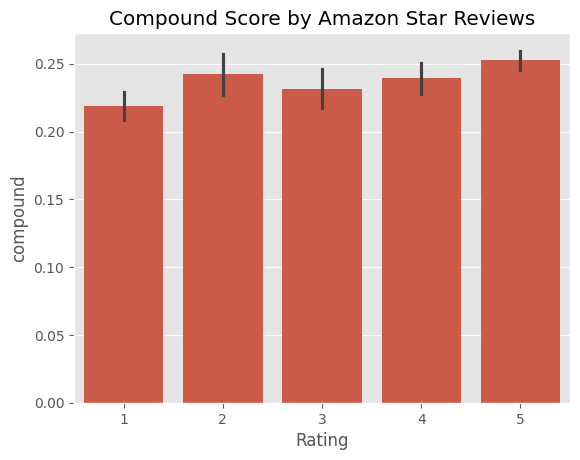

In [8]:
ax = sns.barplot(data = vaders, x = 'Rating', y='compound')
ax.set_title('Compound Score by Amazon Star Reviews')
plt.show()

POS, Neg, Neu Scores of the star Ratings

Observation and Assumptions respectively
- The Plots look similar to one another.

- Vader tends to pick up on a lot of cluster words and may not be finely tuned to nuances
- There are many nuances of specific texts leading to similar sentiment scores across different ratings.

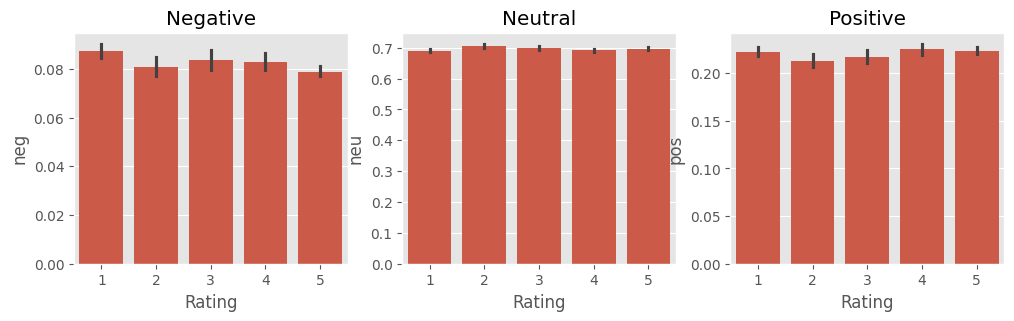

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data = vaders, x = 'Rating', y='neg', ax=axs[0])
sns.barplot(data = vaders, x = 'Rating', y='neu', ax=axs[1])
sns.barplot(data = vaders, x = 'Rating', y='pos', ax=axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.show()

ROBERTA PRETRAINED MODEL
- Uses a model trained of a large corpus of data
- Transformer model accounts for the words but also the context related to other words
- Applying the trained weights to the dataset

In [22]:

#ROBERTA MODEL
import tf_keras as keras
from transformers import RobertaTokenizer
from transformers import RobertaForSequenceClassification
from scipy.special import softmax

#Specific model trained
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = RobertaTokenizer.from_pretrained(MODEL)
model = RobertaForSequenceClassification.from_pretrained(MODEL)

c:\Users\swanjuki\Documents\Kare\Sentiment-Analysis-on-Products\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
# sia.polarity_scores(example)

{'neg': 0.094, 'neu': 0.688, 'pos': 0.218, 'compound': 0.6898}

In [24]:
# encoded text
import numpy as np
encoded_text = tokenizer(example, return_tensors = "pt")
output = model(**encoded_text) #tensor with our results
print(output) 
scores = output[0][0].detach().numpy() #convert to numpy array
scores = softmax(scores) #apply softmax
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)


SequenceClassifierOutput(loss=None, logits=tensor([[-0.7586,  0.0125,  0.9647]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
{'roberta_neg': 0.11408854, 'roberta_neu': 0.24666648, 'roberta_pos': 0.6392449}
